In [1]:
import sys
sys.path.append("..")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import math
import tensorflow as tf
import transforming_dynamics_model
import dynamics_model
import dynamics_subtractive_model

import tf_utils

In [2]:
from experiments.transforming import forward_model

In [3]:
tf.reset_default_graph()
conf = forward_model.get_train_conf()
model = transforming_dynamics_model.DynamicsModel(conf)

setting up network
OrderedDict([('experiment_name', 'jointsig'), ('transform', 'none'), ('data', 'ftrs'), ('data_dir', '/home/ashvin/lsdc/pushing_data/finer_temporal_resolution_substep10'), ('sequence_length', 15), ('skip_frame', 2), ('context_frames', 2), ('use_state', 1), ('train_val_split', 1.0), ('batch_size', 32), ('learning_rate', 0.001), ('visualize', ''), ('file_visual', ''), ('discretize', 20), ('fsize', 100), ('masks', 0), ('run', 0), ('mu1', 0), ('mu2', 1e-05), ('seq', 0)])
using frame sequence:  [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
using frame sequence:  [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
mask size:  (?, 64, 64, 3)
image features: (batch, featsize) (?, 100)
done with network setup


In [4]:
f = model.get_f()

RESTORING FROM
/home/ashvin/tf-lsdc/tf-data/tf_models/experiment_name_jointsig/transform_none/data_ftrs/sequence_length_15/skip_frame_2/context_frames_2/use_state_1/train_val_split_1.0/batch_size_32/learning_rate_0.001/visualize_/file_visual_/discretize_20/fsize_100/masks_0/run_0/mu1_0/mu2_1e-05/seq_0
Checkpoint found and restored: /home/ashvin/tf-lsdc/tf-data/tf_models/experiment_name_jointsig/transform_none/data_ftrs/sequence_length_15/skip_frame_2/context_frames_2/use_state_1/train_val_split_1.0/batch_size_32/learning_rate_0.001/visualize_/file_visual_/discretize_20/fsize_100/masks_0/run_0/mu1_0/mu2_1e-05/seq_0/model-50000


In [5]:
result = model.run('train')[0]

In [6]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [7]:
A = result["action"]
print A.shape

(32, 15, 2)


In [8]:
a = result["pred_f0"]
print a.shape

(32, 2, 20)


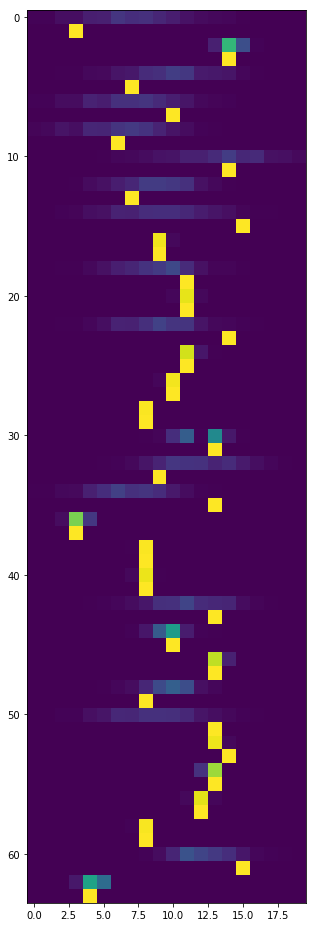

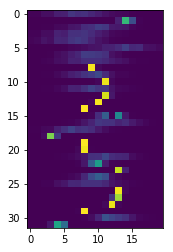

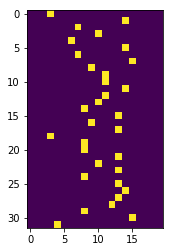

In [9]:
import discretize

B = 32
P = np.zeros((2*B, 20))
P1 = np.zeros((B, 20))
P2 = np.zeros((B, 20))
for b in range(B):
    P[2*b, :] = softmax(a[b, 0, :])
    P[2*b+1, :] = discretize.one_hot_encode(A[b, 0, 0], -10, 10, 20)
    P1[b, :] = softmax(a[b, 0, :])
    P2[b, :] = discretize.one_hot_encode(A[b, 0, 0], -10, 10, 20)

plt.figure(figsize=(5, 20))
plt.imshow(P)
plt.figure()
plt.imshow(P1)
plt.figure()
plt.imshow(P2)

In [10]:
print [v.name for v in tf.trainable_variables()]

[u'transformer/conv1/weights:0', u'transformer/conv1/biases:0', u'transformer/conv2/weights:0', u'transformer/conv2/biases:0', u'transformer/conv3/weights:0', u'transformer/conv3/biases:0', u'transformer/conv4/weights:0', u'transformer/conv4/biases:0', u'transformer/conv5/weights:0', u'transformer/conv5/biases:0', u'transformer/conv6/weights:0', u'transformer/conv6/biases:0', u'transformer/conv7/weights:0', u'transformer/conv7/biases:0', u'transformer/conv8/weights:0', u'transformer/conv8/biases:0', u'conv/conv1/weights:0', u'conv/conv1/biases:0', u'conv/conv2/weights:0', u'conv/conv2/biases:0', u'conv/conv3/weights:0', u'conv/conv3/biases:0', u'conv/conv4/weights:0', u'conv/conv4/biases:0', u'conv/fc5/weights:0', u'conv/fc5/biases:0', u'actionpred/fc_1/weights:0', u'actionpred/fc_1/biases:0', u'actionpred/fc_2/weights:0', u'actionpred/fc_2/biases:0', u'forwardpred/fc_1/weights:0', u'forwardpred/fc_1/biases:0', u'forwardpred/fc_2/weights:0', u'forwardpred/fc_2/biases:0', u'forwardpred/

In [12]:
var = [v for v in tf.trainable_variables() if v.name == "conv/conv1/weights:0"][0]

In [13]:
C1 = var.eval()
print C1.shape

(6, 6, 3, 32)


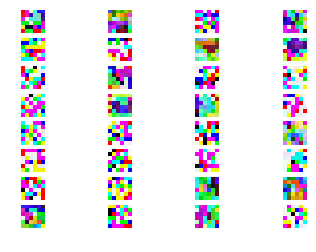

In [14]:
f, ax = plt.subplots(8, 4)
for i in range(32):
    ax[i % 8, i // 8].imshow(C1[:, :, :, i])
    ax[i % 8, i // 8].axis("off")

In [20]:
image_data, action_data = result["image"], result["action"]

print 'action:', action_data.shape
print 'action: batch ind 0', action_data[0]
print 'action: batch ind 1', action_data[1]
print 'images:', image_data.shape

# print 'states:', state_data.shape
# print 'states: batch ind 0', state_data[0]
# print 'states: batch ind 1', state_data[1]
# print 'average speed in dir1:', np.average(state_data[:,:,3])
# print 'average speed in dir2:', np.average(state_data[:,:,2])

action: (32, 15, 2)
action: batch ind 0 [[-6.95789194  1.2072866 ]
 [-6.95789194  1.2072866 ]
 [-6.95789194  1.2072866 ]
 [ 0.49794728 -0.30064756]
 [ 0.49794728 -0.30064756]
 [ 0.49794728 -0.30064756]
 [-1.35197067 -2.5585134 ]
 [-1.35197067 -2.5585134 ]
 [-1.35197067 -2.5585134 ]
 [-2.15561557 -0.74298173]
 [-2.15561557 -0.74298173]
 [-2.15561557 -0.74298173]
 [ 0.32153556  0.45426103]
 [ 0.32153556  0.45426103]
 [ 0.32153556  0.45426103]]
action: batch ind 1 [[ 4.66481447 -2.18197322]
 [ 4.66481447 -2.18197322]
 [ 4.66481447 -2.18197322]
 [-4.46478558  8.81259155]
 [-4.46478558  8.81259155]
 [-4.46478558  8.81259155]
 [ 2.95988297  0.60263443]
 [ 2.95988297  0.60263443]
 [ 2.95988297  0.60263443]
 [ 4.23591757  6.34965086]
 [ 4.23591757  6.34965086]
 [ 4.23591757  6.34965086]
 [ 0.19346926 -0.97372842]
 [ 0.19346926 -0.97372842]
 [ 0.19346926 -0.97372842]]
images: (32, 15, 64, 64, 3)


In [21]:
print np.max(image_data)

0.694118


In [22]:
action_data.shape

(32, 15, 2)

(array([  12.,   27.,   87.,  234.,  234.,  198.,  135.,   24.,    3.,    6.]),
 array([ -9.19637489,  -7.16368504,  -5.13099518,  -3.09830532,
         -1.06561546,   0.96707439,   2.99976425,   5.03245411,
          7.06514397,   9.09783382,  11.13052368]),
 <a list of 10 Patch objects>)

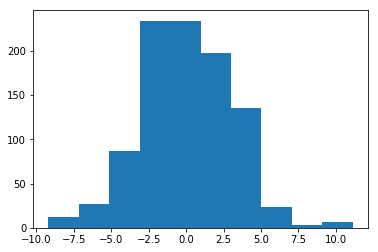

In [23]:
x = action_data.flatten()
plt.hist(x)

In [24]:
np.max(action_data)

11.130524

In [25]:
np.min(action_data)

-9.1963749

In [26]:
image_data.shape

(32, 15, 64, 64, 3)

In [27]:
I = image_data[:, 0:14, :, :, :] - image_data[0, 1:15, :, :, :]
print I.min(), I.max()

-0.682353 0.647059


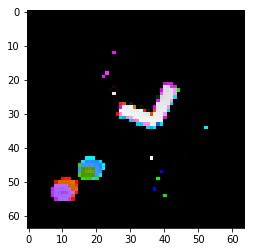

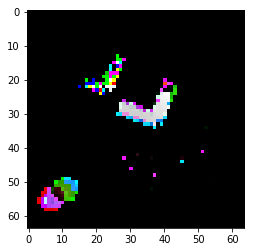

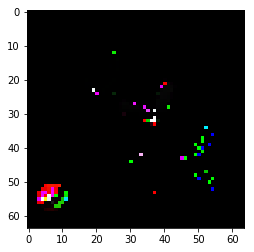

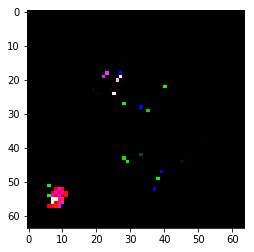

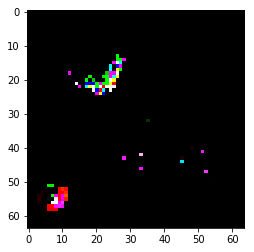

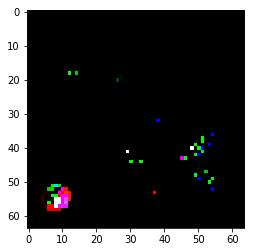

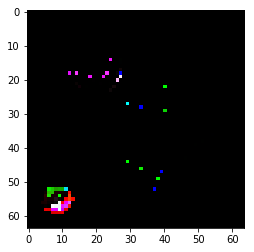

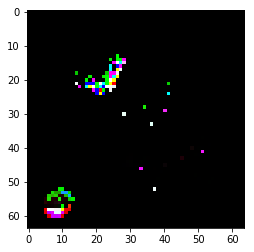

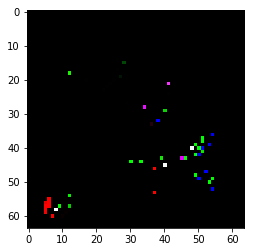

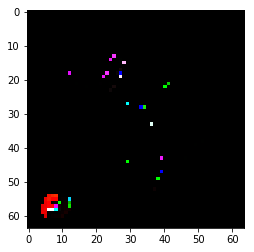

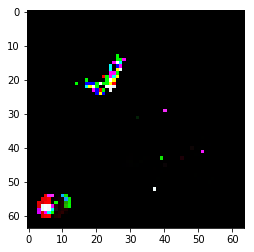

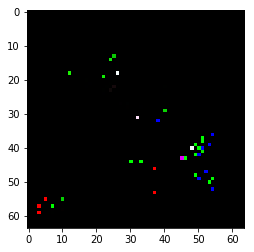

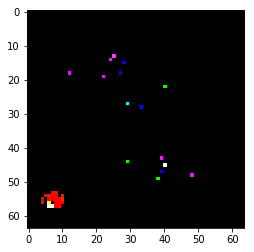

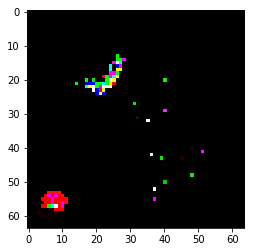

In [28]:
for i in range(14):
    plt.figure()
    plt.imshow(image_data[0, i, :, :, :] - image_data[0, i+1, :, :, :])

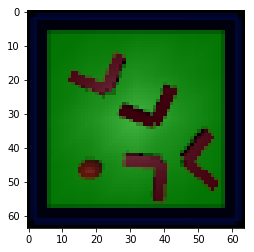

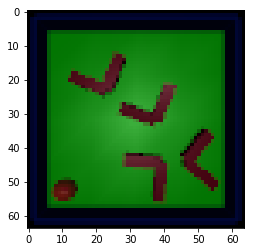

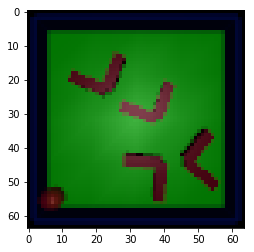

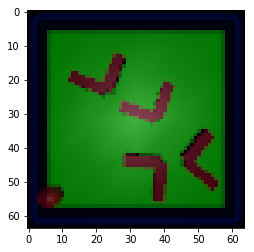

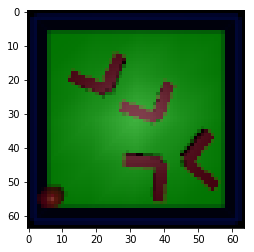

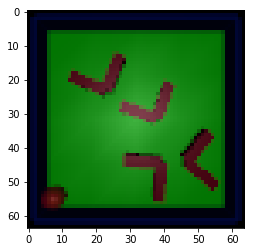

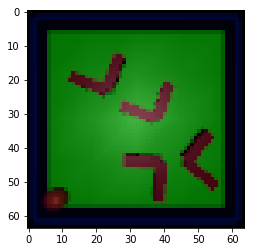

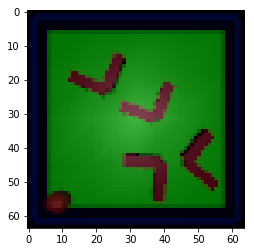

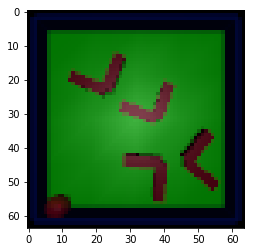

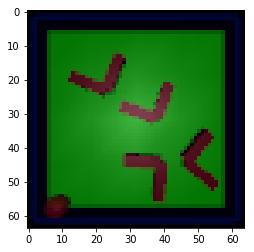

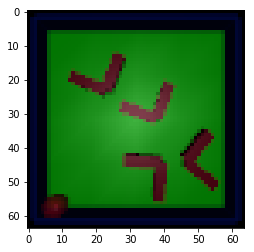

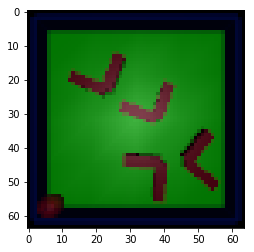

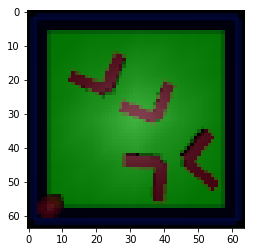

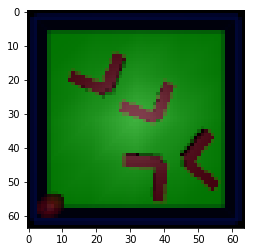

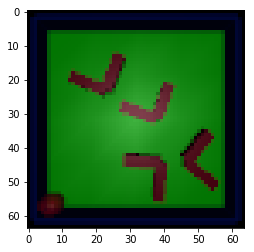

In [29]:
for i in range(15):
    plt.figure()
    plt.imshow(image_data[0, i, :, :, :])

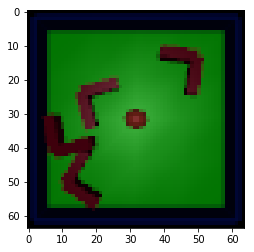

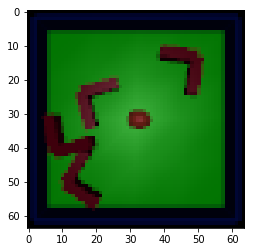

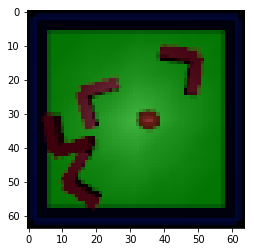

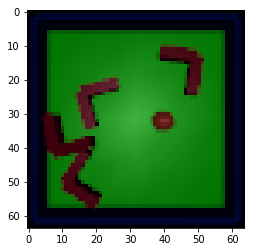

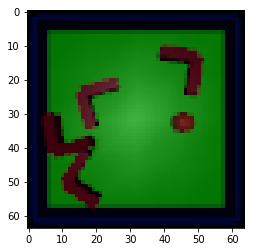

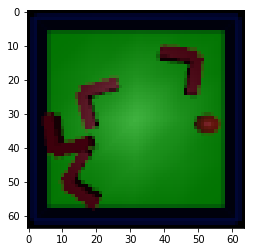

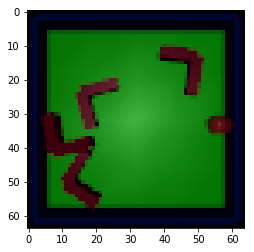

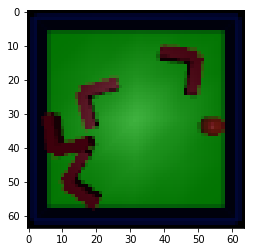

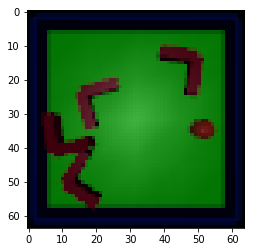

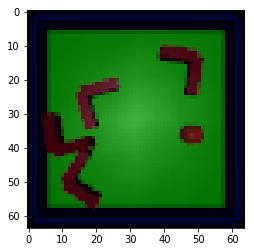

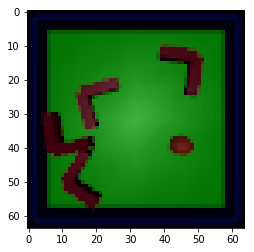

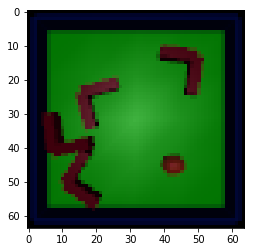

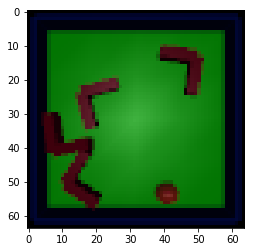

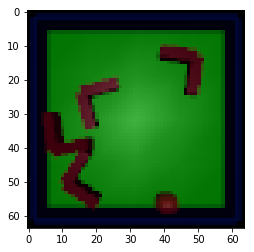

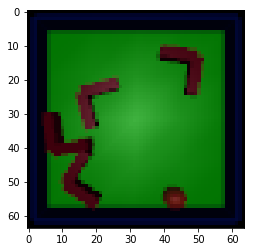

In [12]:
for i in range(15):
    plt.figure()
    plt.imshow(image_data[1, i, :, :, :])